In [99]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')   #한글처리
import seaborn as sns
import pandas as pd

In [87]:
df_TFD = pd.read_csv('../../datasets/TitanicFromDisaster_train.csv')
df_TFD.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Quest01
- 분석 스토리 작성
- dataset : TitanicFromDisaster_train.csv
- DDA, EDA 진행
- 설명변수는 연속형, 범주형 섞어 7개 이상

In [88]:
df_TFD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
## 전처리 : 대상 컬럼 의한 레코드 삭제 시 데이터셋의 양 고려
df_TFD.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [90]:
df_TFD = df_TFD.dropna()  #삭제

In [91]:
df_TFD.isnull().sum()  # 다시 확인

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 상관관계 확인
- 목표변수 : '생존여부' Survived
- 설명변수 : 
    - Pclass 승객등급        : 2등급 > 1등급 > 3등급 순으로 생존율 높음
    - Sex      성별      : 여성 생존율이 높음
    - Age      연령     :  
    - SibSp   승선한 형제자매   :
    - Parch  탑승한 부모자녀        : 
    - Fare    운임       : 
    - Embarked   출항항구    :  C > S > Q순으로 항구생존율 높음 이유는 잘 모르겠음


<Axes: xlabel='Survived', ylabel='count'>

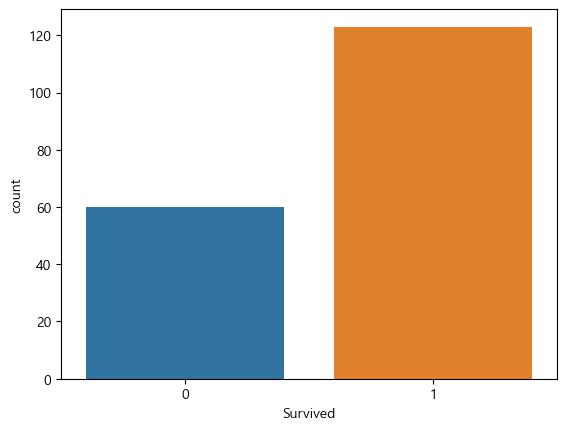

In [92]:
### 데이터 타입과 분포
## 목표변수 
sns.countplot(data= df_TFD,x='Survived')

In [93]:
df_TFD.info() #컬럼성격 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [94]:
#object 변환대상 :'Pclass' , 'Sex' , 'Embarked' ,'Survived'
df_TFD[['Pclass' , 'Sex' , 'Embarked','Survived']] = df_TFD[['Pclass' , 'Sex' , 'Embarked','Survived']].astype(object)
df_TFD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    object 
 2   Pclass       183 non-null    object 
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 18.6+ KB


In [95]:
df_TFD_list = df_TFD.describe().columns.to_list()
df_TFD_list

['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']

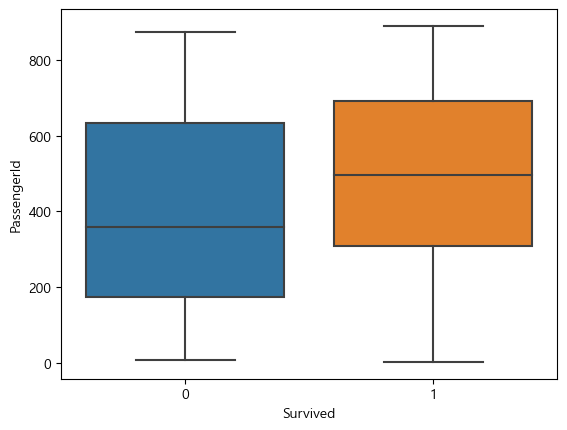

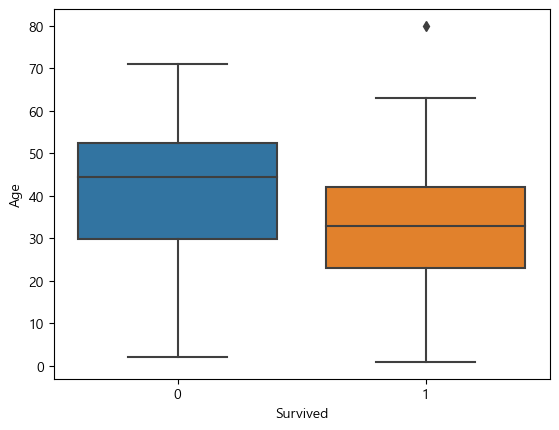

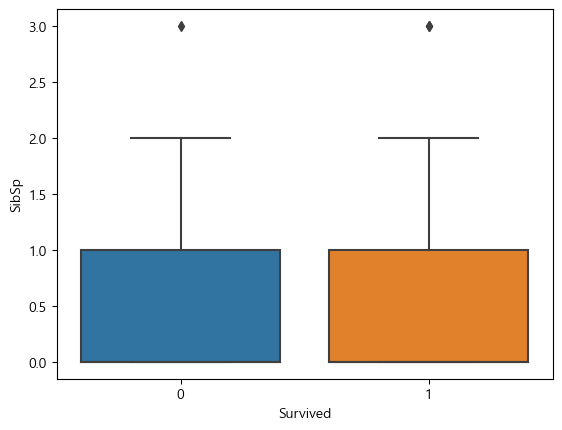

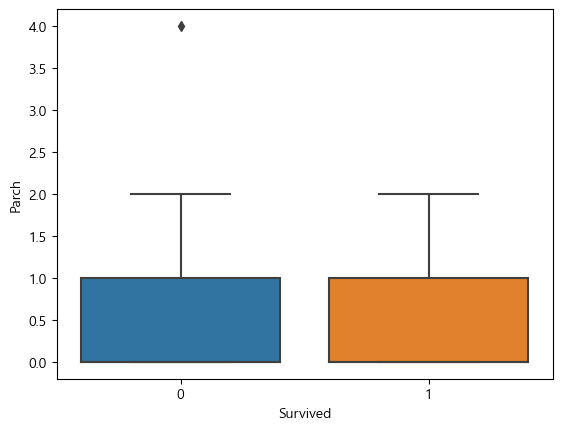

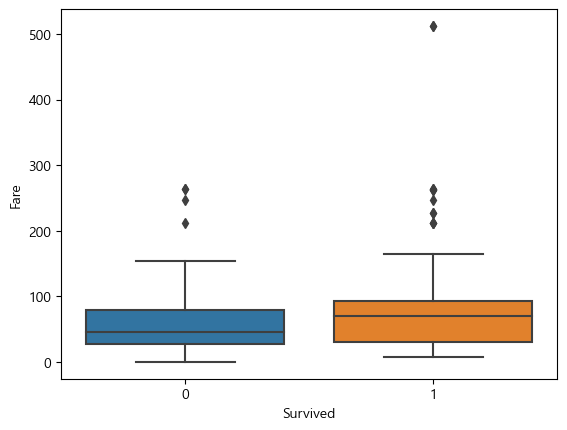

In [96]:
## x : 연속형 / y : 범주형
for item in df_TFD_list :
    sns.boxplot(data=df_TFD, x='Survived',y=item)
    plt.show()

In [97]:
## x : 범주형 / y : 연속형
df_TFD_object_list = df_TFD.describe(include=object).drop(columns=['Survived']).columns.to_list()    #object만 포함되니 컬럼들
df_TFD_object_list

['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

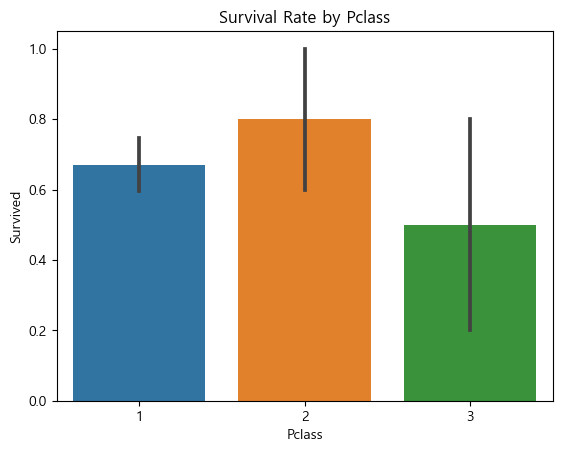

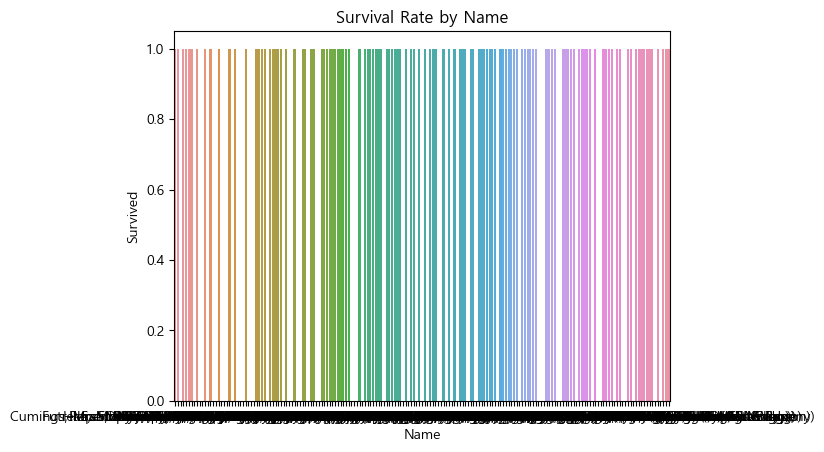

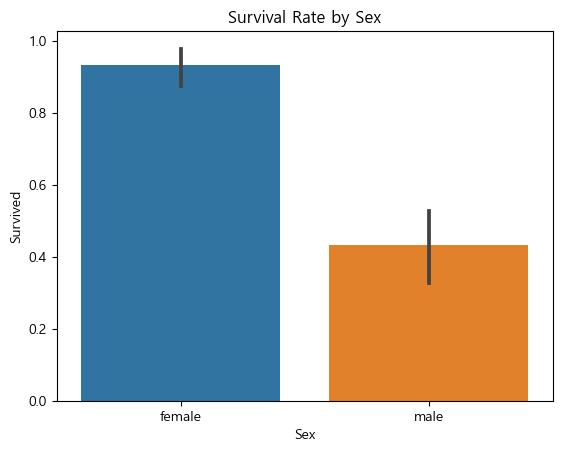

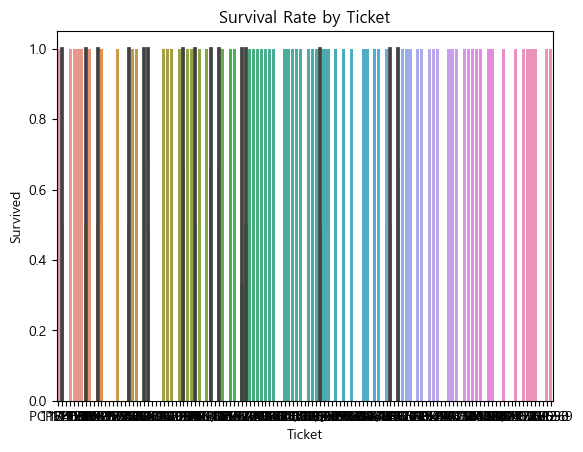

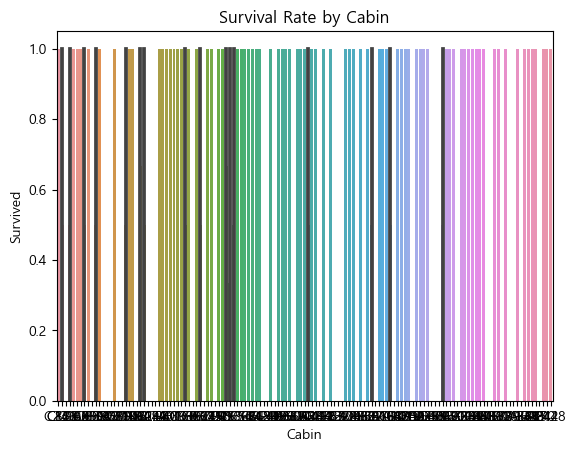

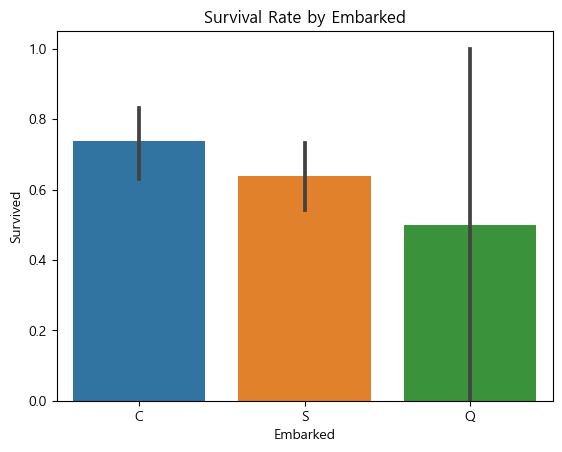

In [98]:
for item in df_TFD_object_list:
    sns.barplot(data=df_TFD, x=item, y='Survived')
    plt.title(f'Survival Rate by {item}')
    plt.show()